In [1]:
import snapatac2 as snap
import numpy as np
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt

In [2]:
snap.__version__

'2.1.3'

## Quality control at bulk level

## Convert bam to fragment file

In [3]:
bam_file = "00.data/sample_2.bam"
fragment_file = "00.data/sample_2.frag.tsv.gz"

In [ ]:
%%time
snap.pp.make_fragment_file(bam_file = bam_file, 
                           output_file = fragment_file, 
                           is_paired = True, 
                           barcode_tag = None, 
                           barcode_regex = '^([ACGT]+):', 
                           umi_tag = None, 
                           umi_regex = None, 
                           shift_left = 4, 
                           shift_right = -5, 
                           min_mapq = 30, 
                           chunk_size = 50000000
                          )

## Import data and QC at single cell level

In [ ]:
fragment_file = "00.data/sample_2.frag.tsv.gz"
h5ad_file = "01.h5ad/sample_2.h5ad"

In [ ]:
%%time
data = snap.pp.import_data(
    fragment_file,
    genome = snap.genome.hg38,
    file = h5ad_file
)
data

In [14]:
data.obs[:]

shape: (12147, 5)
┌────────────────────────┬───────────┬────────────┬──────────┬───────────┐
│ Cell                   ┆ tsse      ┆ n_fragment ┆ frac_dup ┆ frac_mito │
│ ---                    ┆ ---       ┆ ---        ┆ ---      ┆ ---       │
│ str                    ┆ f64       ┆ u64        ┆ f64      ┆ f64       │
╞════════════════════════╪═══════════╪════════════╪══════════╪═══════════╡
│ AAACGCAAGCAAACCCGAGATA ┆ 16.40178  ┆ 3458       ┆ 0.582183 ┆ 0.006322  │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┤
│ AAACGCAAGCAAACGTCCCGTT ┆ 7.142857  ┆ 838        ┆ 0.446281 ┆ 0.10661   │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┤
│ AAACGCAAGCAAAGCCCACGAC ┆ 12.92744  ┆ 7917       ┆ 0.534242 ┆ 0.001639  │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┤
│ AAACGCAAGCAAATAAGGCCAG ┆ 16.847373 ┆ 4936       ┆ 0.575268 ┆ 0.002022  │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┤
│ ...                    ┆ ...       ┆ ...        ┆ ...      ┆ ...       │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┤
│ TTTCTGTCGGTTTACCCGTCGA ┆ 10.76555  ┆ 8149       ┆ 0.593111 ┆ 0.003058  │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┤
│ TTTCTGTCGGTTTCCACGCAGT ┆ 15.51824  ┆ 4956       ┆ 0.601841 ┆ 0.045087  │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┤
│ TTTCTGTCGGTTTCGCGTGTAA ┆ 13.493823 ┆ 10221      ┆ 0.598865 ┆ 0.003121  │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┤
│ TTTCTGTCGGTTTGCCGGAAGG ┆ 25.142045 ┆ 3693       ┆ 0.586203 ┆ 0.005386  │
└────────────────────────┴───────────┴────────────┴──────────┴───────────┘

In [15]:
from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn

def density_scatter( x , y, ax = None, sort = True, bins = 10, **kwargs )   :
    """
    Scatter plot colored by 2d histogram
    """
    if ax is None :
        fig , ax = plt.subplots()
    data , x_e, y_e = np.histogram2d( x, y, bins = bins, density = True )
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)

    #To be sure to plot all data
    z[np.where(np.isnan(z))] = 0.0

    # Sort the points by density, so that the densest points are plotted last
    if sort :
        idx = z.argsort()
        x, y, z = x[idx], y[idx], z[idx]

    ax.scatter( x, y, c=z, **kwargs )

    norm = Normalize(vmin = np.min(z), vmax = np.max(z))
    cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
    cbar.ax.set_ylabel('Density')

    return ax

<AxesSubplot:>

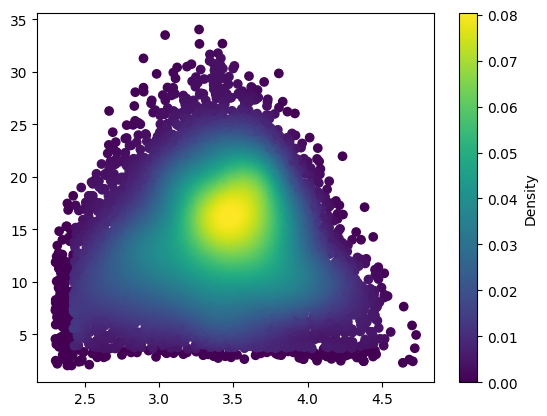

In [16]:
x = np.log10(data.obs["n_fragment"])
y = data.obs["tsse"]
density_scatter( x, y )

In [17]:
%%time
snap.pp.filter_cells(data, 
                     min_counts=1000, 
                     min_tsse=10, 
                     max_counts=50000)
data

CPU times: user 14.4 s, sys: 1.92 s, total: 16.4 s
Wall time: 16.5 s


AnnData object with n_obs x n_vars = 7995 x 0 backed at '00.data/sample_2.h5ad'
    obs: Cell, tsse, n_fragment, frac_dup, frac_mito
    uns: reference_sequences
    obsm: insertion

In [18]:
%%time
snap.pp.add_tile_matrix(data, 
                        bin_size=5000, 
                        n_jobs=4
                       )

CPU times: user 20.7 s, sys: 2.19 s, total: 22.9 s
Wall time: 13.6 s


In [19]:
snap.pp.select_features(data,
                       min_cells=1
                       )

## Doublets removel

In [20]:
%%time
snap.pp.scrublet(data)

2022-11-16 23:22:00 - INFO - Simulating doublets...
2022-11-16 23:22:01 - INFO - Spectral embedding ...
2022-11-16 23:23:42 - INFO - Calculating doublet scores...


CPU times: user 21min 1s, sys: 2min 30s, total: 23min 32s
Wall time: 3min 9s


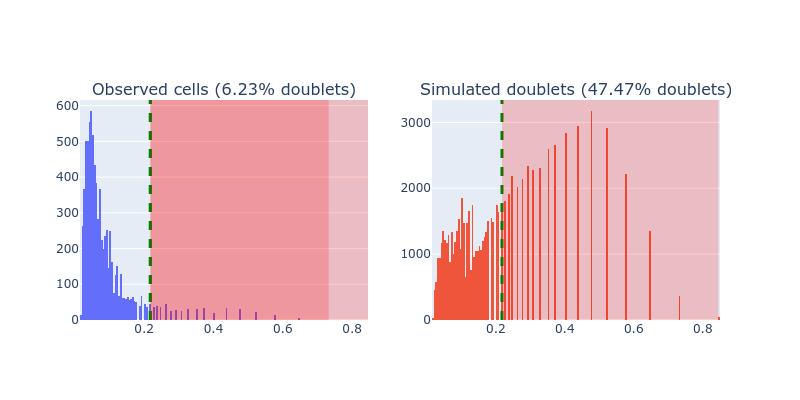

In [21]:
snap.pp.call_doublets(data)
snap.pl.scrublet(data, interactive=False)

In [22]:
data.subset(~data.obs["is_doublet"])
data

AnnData object with n_obs x n_vars = 7497 x 617665 backed at '00.data/sample_2.h5ad'
    obs: Cell, tsse, n_fragment, frac_dup, frac_mito, doublet_score, is_doublet
    var: Feature_ID, selected
    uns: scrublet_sim_doublet_score, reference_sequences, scrublet_threshold
    obsm: insertion

## Dimenstion reduction

In [23]:
%%time
snap.tl.spectral(data)

2022-11-16 23:26:20 - INFO - Compute similarity matrix
2022-11-16 23:26:25 - INFO - Normalization
2022-11-16 23:26:27 - INFO - Perform decomposition


CPU times: user 3min 56s, sys: 38.7 s, total: 4min 35s
Wall time: 17.7 s


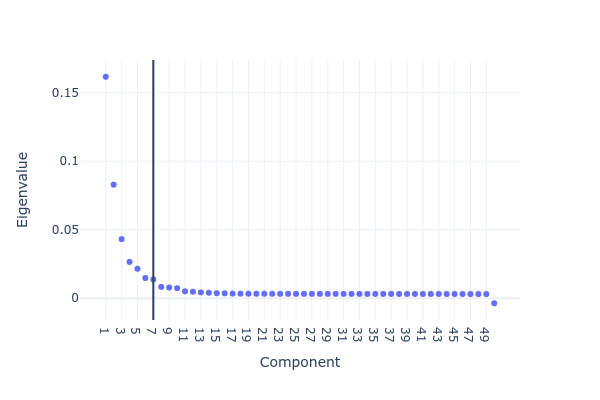

In [24]:
snap.pl.spectral_eigenvalues(data, interactive=False)

In [25]:
%%time
snap.tl.umap(data, use_dims=10)

/home/yangli/apps/anaconda3/envs/SnapATAC2/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



CPU times: user 38.8 s, sys: 19.6 s, total: 58.4 s
Wall time: 28 s


## Clustering analysis

In [26]:
%%time
snap.pp.knn(data, use_dims=10)

CPU times: user 5.73 s, sys: 52.7 ms, total: 5.78 s
Wall time: 532 ms


In [27]:
%%time
snap.tl.leiden(data, 
               resolution = 1,
               random_state=2022
              )

CPU times: user 334 ms, sys: 36.2 ms, total: 370 ms
Wall time: 367 ms


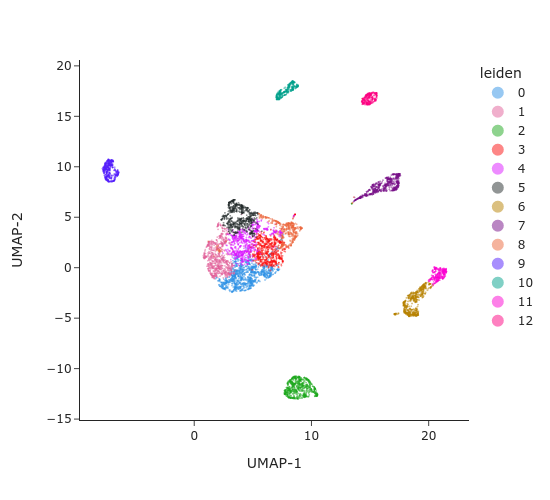

In [28]:
snap.pl.umap(data, color="leiden", interactive=False)

In [29]:
data.close()

## Cell cluster annotation

In [4]:
h5ad_file = "01.h5ad/sample_2.h5ad"
data = snap.read(h5ad_file, "r+")

In [31]:
gmat_h5ad_file = "01.h5ad/sample_2.gmat.h5ad"

In [32]:
%%time
gmat = snap.pp.make_gene_matrix(data, 
                                snap.genome.hg38, 
                                file = gmat_h5ad_file
                               )
gmat

CPU times: user 2min 6s, sys: 2.78 s, total: 2min 9s
Wall time: 23.4 s


AnnData object with n_obs x n_vars = 7497 x 60606 backed at '00.data/sample_2.gmat.h5ad'
    obs: Cell, tsse, n_fragment, frac_dup, frac_mito, doublet_score, is_doublet, leiden
    var: Feature_ID

In [33]:
gmat.close()

## Imputation

In [34]:
import scanpy as sc

In [35]:
gmat_h5ad_file = "01.h5ad/sample_2.gmat.h5ad"

In [36]:
gmat = sc.read(gmat_h5ad_file)

In [37]:
sc.pp.filter_genes(gmat, min_cells=3)
sc.pp.normalize_total(gmat)
sc.pp.log1p(gmat)

In [38]:
%%time
sc.external.pp.magic(gmat, solver="approximate")

/home/yangli/.local/lib/python3.7/site-packages/magic/utils.py:145: FutureWarning:

X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.



CPU times: user 1min 27s, sys: 1min 6s, total: 2min 34s
Wall time: 38.2 s


In [39]:
# Copy over UMAP embedding
gmat.obsm["X_umap"] = data.obsm["X_umap"]

In [40]:
marker_genes = ['AQP4', # Astrocyte (ASC)
                'PDGFRA', # Oligodendrocyte precursor cells (OPC)
                'SOX10', # Oligodendrocyte (OGC)
                'C1QB', # Microglia (MGC)
                'SLC17A7', # Glutamatergic neurons (GLUT)
                'SLC17A6', # Glutamatergic neurons (GLUT)
                'GAD2'] # GABAergic neurons (GABA)

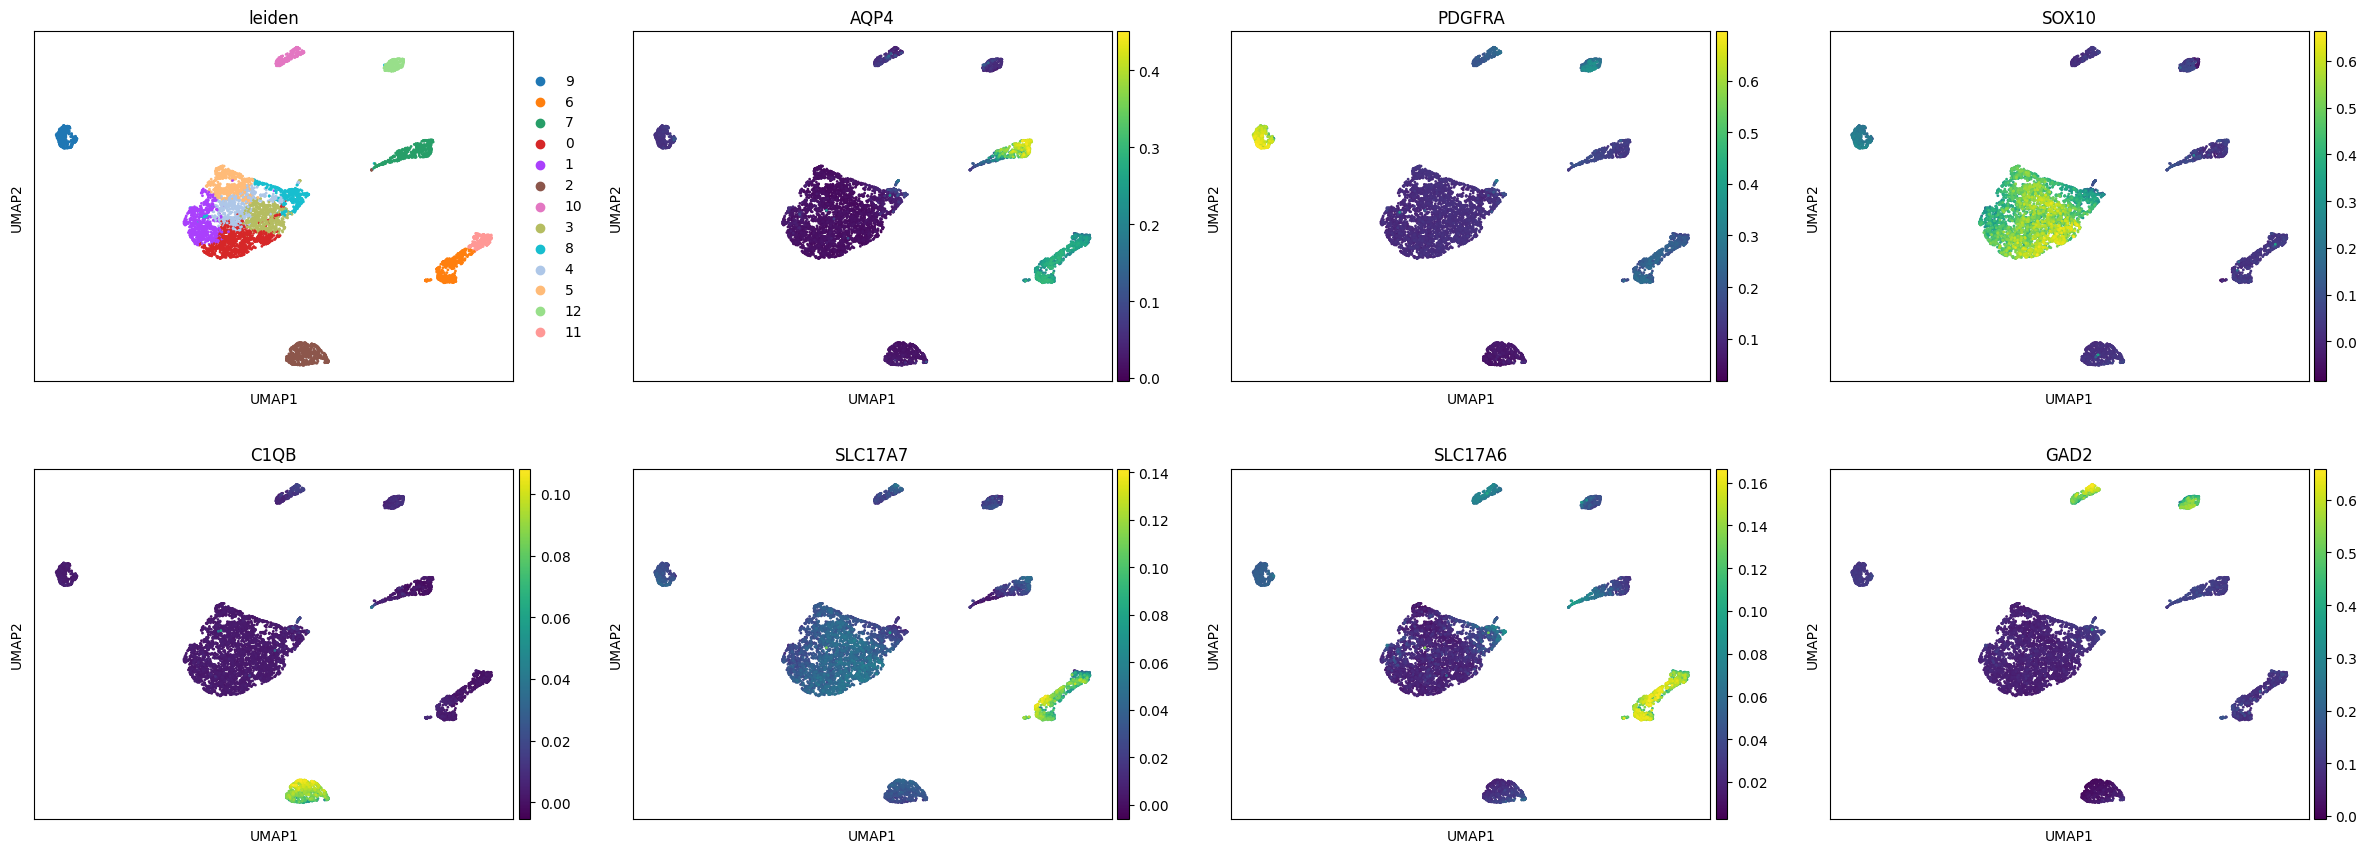

In [41]:
sc.pl.umap(gmat, use_raw=False, color=["leiden"] + marker_genes)

In [43]:
snap.pl.umap(data, color="leiden", interactive=True)

In [44]:
annotation = {
    "0": "OGC",
    "1": "OGC",
    "2": "MGC",
    "3": "OGC",
    "4": "OGC",
    "5": "OGC",
    "6": "GLUT",
    "7": "ASC",
    "8": "OGC",
    "9": "OPC",
    "10": "GABA",
    "11": "GLUT",
    "12": "GABA"
}

cell_type_anno = [annotation[i] for i in data.obs['leiden']]

In [45]:
data.obs['cell_type'] = pd.Series(cell_type_anno).astype('category')

In [46]:
data.write("01.h5ad/sample_2.anno.h5ad")
data.close()

## Peak calling at the cluster-level

In [47]:
h5ad_file = "01.h5ad/sample_2.anno.h5ad"
data = snap.read(h5ad_file, "r+")

In [48]:
%%time
snap.tl.call_peaks(data, groupby="cell_type", out_dir = "02.peaks/sample_2/")

2022-11-16 23:45:42 - INFO - Exporting data...
2022-11-16 23:47:49 - INFO - Calling peaks for 6 groups ...
2022-11-16 23:50:27 - INFO - Merging peaks...


CPU times: user 2min 8s, sys: 7.34 s, total: 2min 16s
Wall time: 4min 51s


In [50]:
data.uns['peaks'].head()

shape: (5, 7)
┌────────────────────┬───────┬───────┬───────┬───────┬──────┬───────┐
│ Peaks              ┆ OPC   ┆ GLUT  ┆ MGC   ┆ ASC   ┆ OGC  ┆ GABA  │
│ ---                ┆ ---   ┆ ---   ┆ ---   ┆ ---   ┆ ---  ┆ ---   │
│ str                ┆ bool  ┆ bool  ┆ bool  ┆ bool  ┆ bool ┆ bool  │
╞════════════════════╪═══════╪═══════╪═══════╪═══════╪══════╪═══════╡
│ chr1:9926-10427    ┆ true  ┆ false ┆ false ┆ false ┆ true ┆ false │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌┼╌╌╌╌╌╌╌┤
│ chr1:180553-181054 ┆ false ┆ true  ┆ true  ┆ false ┆ true ┆ false │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌┼╌╌╌╌╌╌╌┤
│ chr1:181230-181731 ┆ false ┆ false ┆ false ┆ false ┆ true ┆ false │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌┼╌╌╌╌╌╌╌┤
│ chr1:191230-191731 ┆ true  ┆ false ┆ false ┆ true  ┆ true ┆ true  │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌┼╌╌╌╌╌╌╌┤
│ chr1:267756-268257 ┆ false ┆ false ┆ false ┆ false ┆ true ┆ false │
└────────────────────┴───────┴───────┴───────┴───────┴──────┴───────┘

In [51]:
pmat_h5ad_file = "01.h5ad/sample_2.pmat.h5ad"

In [52]:
%%time
pmat = snap.pp.make_peak_matrix(data, file=pmat_h5ad_file)
pmat

CPU times: user 1min 7s, sys: 1.69 s, total: 1min 8s
Wall time: 11.3 s


AnnData object with n_obs x n_vars = 7497 x 385815 backed at '00.data/sample_2.pmat.h5ad'
    obs: Cell, tsse, n_fragment, frac_dup, frac_mito, doublet_score, is_doublet, leiden, cell_type
    var: Feature_ID

## generate IGV tracks

In [ ]:
%%bash
cd 02.peaks/sample_2/

fetchChromSizes hg38 > hg38.chrom.sizes

for i in ASC OPC OGC MGC GLUT GABA;
  do echo $i;
  # convert bed to bam
  zcat ${i}_insertion.bed.gz | sort -k1,1 -k2,2n | awk '{print $0"\t"NR}' |\
  bedToBam -i - -g hg38.chrom.sizes > ${i}_insertion.bam
  samtools index ${i}_insertion.bam
  # generate bigwig 
  bamCoverage --bam ${i}_insertion.bam -o ${i}_insertion.bw --normalizeUsing RPKM
done

In [63]:
snap.ex.export_bigwig(data, 
                      groupby="cell_type", 
                      out_dir='./02.peaks/sample_2/', 
                      prefix='', 
                      suffix='.bw')

2022-11-17 00:11:45 - INFO - Compute coverage for 6 groups...
2022-11-17 00:12:12 - INFO - Exporting bigwig files...


{'OPC': './02.peaks/sample_2/OPC.bw',
 'GABA': './02.peaks/sample_2/GABA.bw',
 'MGC': './02.peaks/sample_2/MGC.bw',
 'ASC': './02.peaks/sample_2/ASC.bw',
 'GLUT': './02.peaks/sample_2/GLUT.bw',
 'OGC': './02.peaks/sample_2/OGC.bw'}

## Identify differentially accessible regions

In [56]:
pmat_h5ad_file = "01.h5ad/sample_2.pmat.h5ad"
pmat = snap.read(pmat_h5ad_file, "r+")

In [57]:
%%time
marker_peaks = snap.tl.marker_regions(pmat, groupby='cell_type', pvalue=0.05)

CPU times: user 8.07 s, sys: 492 ms, total: 8.57 s
Wall time: 8.58 s


In [58]:
marker_peaks

{'ASC': array(['chr1:924502-925003', 'chr1:940110-940611', 'chr1:975961-976462',
        ..., 'chrY:20648154-20648655', 'chrY:21829819-21830320',
        'chrY:26670747-26671248'], dtype='<U25'),
 'GABA': array(['chr1:1342974-1343475', 'chr1:1402182-1402683',
        'chr1:1539658-1540159', ..., 'chrY:21092744-21093245',
        'chrY:21200673-21201174', 'chrY:26503276-26503777'], dtype='<U25'),
 'GLUT': array(['chr1:850271-850772', 'chr1:982876-983377', 'chr1:1034355-1034856',
        ..., 'chrY:21840571-21841072', 'chrY:21859996-21860497',
        'chrY:26511081-26511582'], dtype='<U25'),
 'MGC': array(['chr1:817073-817574', 'chr1:817735-818236', 'chr1:906672-907173',
        ..., 'chrY:21440497-21440998', 'chrY:21439904-21440405',
        'chrY:21481493-21481994'], dtype='<U25'),
 'OGC': array(['chr1:959091-959592', 'chr1:1023620-1024121',
        'chr1:1027931-1028432', ..., 'chrY:26359077-26359578',
        'chrY:26549192-26549693', 'chrY:26562932-26563433'], dtype='<U25'),
 'OPC'

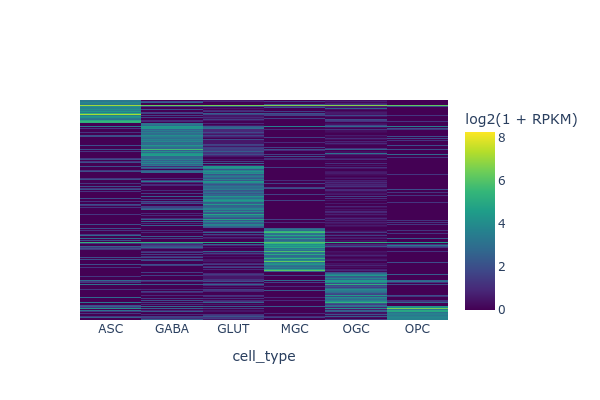

In [59]:
snap.pl.regions(pmat, groupby='cell_type', peaks=marker_peaks, interactive=False)

## motif enrichment

In [60]:
%%time
motifs = snap.tl.motif_enrichment(
    motifs=snap.datasets.cis_bp(unique=True),
    regions=marker_peaks,
    genome_fasta=snap.genome.hg38,
)

2022-11-16 23:51:42 - INFO - Fetching 211495 sequences ...
2022-11-16 23:51:50 - INFO - Computing enrichment ...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1165/1165 [18:31<00:00,  1.05it/s]


CPU times: user 6h 34min 45s, sys: 30 s, total: 6h 35min 15s
Wall time: 18min 42s


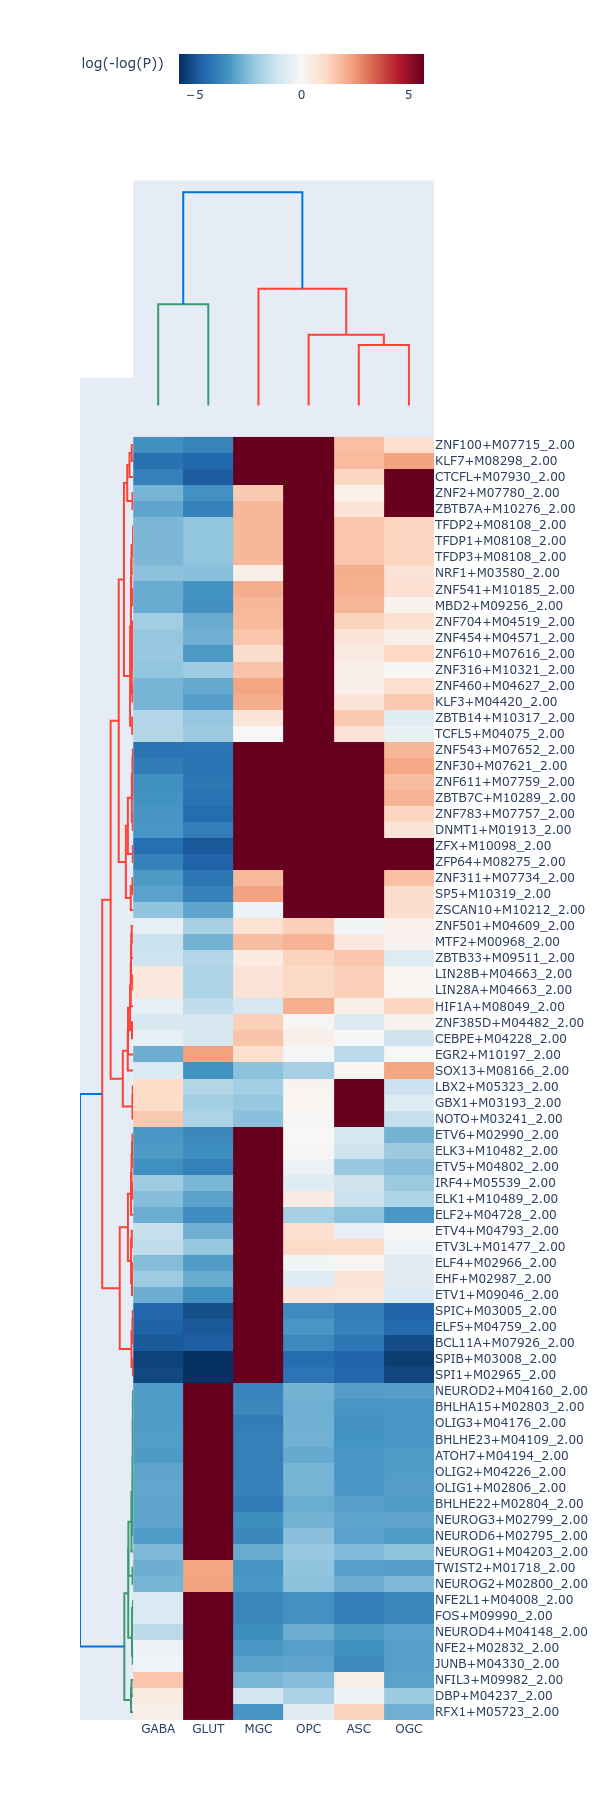

In [61]:
snap.pl.motif_enrichment(motifs, 
                         max_fdr=0.001, 
                         min_log_fc=1, 
                         height=1800, 
                         interactive=False
                        )